## Import des libairies 

In [27]:
!pip install sqldf

In [158]:
import pandas as pd
import sqldf
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns

In [29]:
data = pd.read_excel('ONLINE_RETAILS.xlsx')

In [30]:
len(data)

541909

In [31]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [33]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Data cleanning

Remplaçons les valeurs vides par 0 pour les colonnes de type entier ou décimal

In [34]:
data[['InvoiceNo', 'Quantity', 'UnitPrice', 'CustomerID']]=data[['InvoiceNo', 'Quantity', 'UnitPrice', 'CustomerID']].fillna(0)

In [35]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')

In [36]:
data['InvoiceDate']= data['InvoiceDate'].dt.strftime("%Y-%m-%d")

In [37]:
data['CustomerID']= data['CustomerID'].astype(int)

In [38]:
data['UnitPrice'] = data['UnitPrice'].astype(float)

In [39]:
data['Quantity'] = data['Quantity'].abs()

In [40]:
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [41]:
data['year'] = pd.DatetimeIndex(data['InvoiceDate']).year 
data['month'] = pd.DatetimeIndex(data['InvoiceDate']).month 
data['day'] = pd.DatetimeIndex(data['InvoiceDate']).day

In [42]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,2010,12,1


In [43]:
data = data.drop_duplicates()

In [44]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,2010,12,1
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France,2011,12,9
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France,2011,12,9
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France,2011,12,9
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France,2011,12,9


>> Réponses aux questions

<h2 style ='color, red'>Question 1</h2>

Le nombre de produits achetés par un client lors d'une dépense

In [45]:
requete = """ 
SELECT CustomerID, InvoiceNo, avg(Quantity) as moyenne_quantity 
FROM data 
Group by CustomerID, InvoiceNo
""" 

In [46]:
question_1 = sqldf.run(requete)

In [104]:
question_1

,CustomerID,InvoiceNo,moyenne_quantity
0,0,536414,56.000000
1,0,536544,2.292220
2,0,536545,1.000000
3,0,536546,1.000000
4,0,536547,1.000000
...,...,...,...
25895,18283,579673,2.640000
25896,18283,580872,2.840000
25897,18287,554065,16.827586
25898,18287,570715,26.052632


In [105]:
tableau_pays = pd.DataFrame()

In [49]:
tableau_pays['moyenne'] = data.groupby('Country')['Quantity'].mean()

In [51]:
tableau_pays['median'] = data.groupby('Country')['Quantity'].apply(np.median)

In [52]:
tableau_pays_final = tableau_pays.reset_index()

In [53]:
tableau_pays_final

,Country,moyenne,median
0,Australia,67.372814,24.0
1,Austria,12.306733,10.0
2,Bahrain,19.368421,6.0
3,Belgium,11.272112,10.0
4,Brazil,11.125000,10.0
5,Canada,18.298013,12.0
6,Channel Islands,12.545575,10.0
7,Cyprus,10.448445,6.0
8,Czech Republic,25.000000,24.0
9,Denmark,21.290488,12.0


<AxesSubplot:xlabel='Country'>

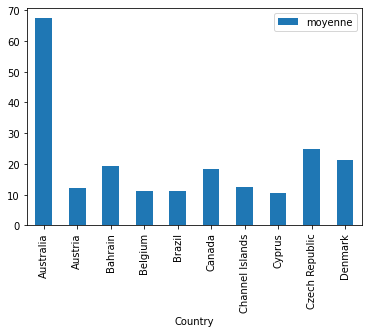

In [54]:
tableau_pays_final.head(10).plot(kind='bar', x='Country', y='moyenne') 

<AxesSubplot:xlabel='Country'>

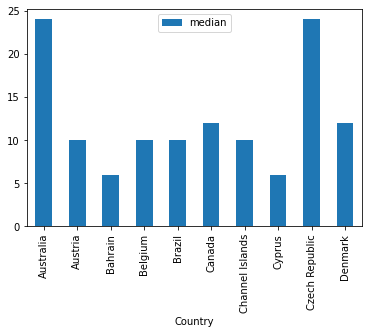

In [55]:
tableau_pays_final.head(10).plot(kind='bar', x='Country', y='median')

## Question 2

Le montant dépensé par un client lors d'une dépense

In [56]:
montant_client = """ 
SELECT CustomerID, InvoiceNo, avg(UnitPrice*Quantity) as moyenne_depense 
FROM data
group by CustomerID, InvoiceNo """

In [57]:
montant_table = data.copy() 

In [58]:
montant_pays = pd.DataFrame() 

In [67]:
montant_pays

moyenne  mediane
Country     InvoiceNo                     
Australia   536389      25.589286   19.125
            537676      32.362500   28.500
            539419      38.688889   19.800
            540267     152.421304  105.800
            540280      71.500000   71.500
...                           ...      ...
Unspecified 563947      36.128571   29.700
            564051      17.383125   16.550
            565303       4.373846    2.100
            576646      17.536842   17.400
            578539      18.604412   15.150

[25900 rows x 2 columns]

In [68]:
montant_table['montant_tota']= montant_table['Quantity']*montant_table['UnitPrice'] 

In [69]:
montant_pays['moyenne'] = montant_table.groupby(['Country', 'InvoiceNo'])['montant_tota'].mean()

In [70]:
montant_pays['mediane'] = montant_table.groupby(['Country', 'InvoiceNo'])['montant_tota'].apply(np.median)

In [94]:
montant_pays_final=montant_pays.reset_index()

In [97]:
montant_pays_final

,Country,InvoiceNo,moyenne,mediane
0,Australia,536389,25.589286,19.125
1,Australia,537676,32.362500,28.500
2,Australia,539419,38.688889,19.800
3,Australia,540267,152.421304,105.800
4,Australia,540280,71.500000,71.500
...,...,...,...,...
25895,Unspecified,563947,36.128571,29.700
25896,Unspecified,564051,17.383125,16.550
25897,Unspecified,565303,4.373846,2.100
25898,Unspecified,576646,17.536842,17.400


<AxesSubplot:xlabel='Country'>

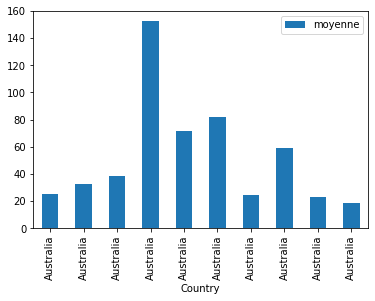

In [100]:
montant_pays_final.head(10).plot(kind='bar', x='Country', y='moyenne') 

<AxesSubplot:xlabel='Country'>

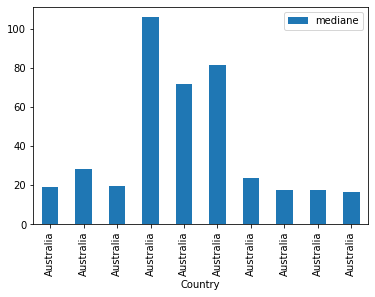

In [102]:
montant_pays_final.head(10).plot(kind='bar', x='Country', y='mediane') 

## Question 3

Les 5 produits lesplus vendus pendant le premier trimestre en 2011 

In [86]:
top_5_produits_vendus = """ 
SELECT StockCode, sum(Quantity) as quantite_vendus 
FROM data
where year='2011' and month between 1 and 3 group by StockCode 
order by quantite_vendus desc limit 5 
"""

In [87]:
tableau_top_vendus = sqldf.run(top_5_produits_vendus)

In [88]:
tableau_top_vendus 

,StockCode,quantite_vendus
0,23166,148430
1,85099B,11220
2,21212,9479
3,85123A,9434
4,84077,8898


Les 5 produits lesplus vendus pendant le second trimestre en 2011 

In [89]:
tableau_top_vendus_python = data[(data['year']==2011) & (data['month'].between(1,3))] 

In [90]:
tableau_top_vendus_python 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04,1.95,13313,United Kingdom,2011,1,4
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04,0.42,13313,United Kingdom,2011,1,4
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04,0.42,13313,United Kingdom,2011,1,4
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04,2.10,13313,United Kingdom,2011,1,4
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04,1.25,13313,United Kingdom,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...
142078,548548,22423,REGENCY CAKESTAND 3 TIER,1,2011-03-31,12.75,17781,United Kingdom,2011,3,31
142079,548548,21361,LOVE LARGE WOOD LETTERS,7,2011-03-31,12.75,17781,United Kingdom,2011,3,31
142080,548549,84763,ZINC FINISH 15CM PLANTER POTS,100,2011-03-31,1.06,16365,United Kingdom,2011,3,31
142081,548549,22222,CAKE PLATE LOVEBIRD WHITE,1,2011-03-31,4.95,16365,United Kingdom,2011,3,31


In [91]:
tableau_top_vendus_python = tableau_top_vendus_python.groupby('StockCode').agg({'Quantity':'sum'}) 

In [92]:
tableau_top_vendus_python 

,Quantity
StockCode,
10002,600
10080,2
10120,58
10123C,4
10124A,8
...,...
POST,1674
S,29
gift_0001_10,1


In [93]:
tableau_top_vendus_python.sort_values('Quantity',ascending=False).head(5)

,Quantity
StockCode,
23166,148430
85099B,11220
21212,9479
85123A,9434
84077,8898


## Question 4 

Les 5 pays qui ont générés le plus gros chiffres d'affaires pendant le premier trimestre de 2011

In [110]:
CA_pays = """
SELECT Country, sum(Quantity * UnitPrice) as chiffre_daff
FROM data
where year='2011' and month between 1 and 3
group by Country 
order by chiffre_daff desc
limit 5
"""

In [111]:
tab_CA_pays = sqldf.run(CA_pays)

In [112]:
tab_CA_pays

,Country,chiffre_daff
0,United Kingdom,1748835.50
1,Netherlands,72119.36
2,EIRE,62541.99
3,Germany,42148.47
4,France,41227.78


In [113]:
##### python

In [118]:
pays_top_5 = data[(data['year']==2011) & (data['month'].between(1,3))]

In [121]:
pays_top_5['montant_totat']= pays_top_5['Quantity']*pays_top_5['UnitPrice']

C:\Users\mamef\AppData\Local\Temp/ipykernel_52572/36093115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pays_top_5['montant_totat']= pays_top_5['Quantity']*pays_top_5['UnitPrice']


In [120]:
pays_top_5

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,montant_totat
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04,1.95,13313,United Kingdom,2011,1,4,19.50
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04,0.42,13313,United Kingdom,2011,1,4,10.50
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04,0.42,13313,United Kingdom,2011,1,4,10.50
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04,2.10,13313,United Kingdom,2011,1,4,10.50
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04,1.25,13313,United Kingdom,2011,1,4,12.50
...,...,...,...,...,...,...,...,...,...,...,...,...
142078,548548,22423,REGENCY CAKESTAND 3 TIER,1,2011-03-31,12.75,17781,United Kingdom,2011,3,31,12.75
142079,548548,21361,LOVE LARGE WOOD LETTERS,7,2011-03-31,12.75,17781,United Kingdom,2011,3,31,89.25
142080,548549,84763,ZINC FINISH 15CM PLANTER POTS,100,2011-03-31,1.06,16365,United Kingdom,2011,3,31,106.00
142081,548549,22222,CAKE PLATE LOVEBIRD WHITE,1,2011-03-31,4.95,16365,United Kingdom,2011,3,31,4.95


In [161]:
pays_top_5.groupby('Country').agg({'montant_totat':'sum'}).sort_values('montant_totat',ascending=False).head(5)

,montant_totat
Country,
United Kingdom,1748835.50
Netherlands,72119.36
EIRE,62541.99
Germany,42148.47
France,41227.78


## Question 5

Tracons l’évolution mensuelle du montant moyen d’un panier client pour chacun de ces cinq pays.

<AxesSubplot:xlabel='Country'>

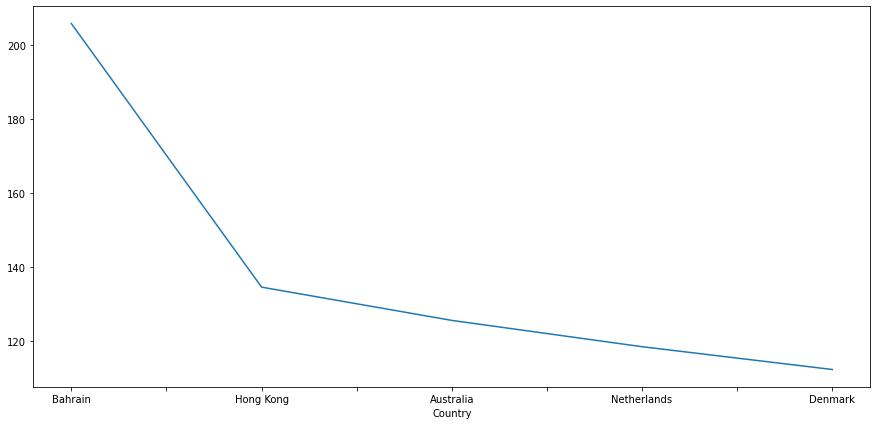

In [127]:
pays_top_5['montant_totat'].groupby(pays_top_5['Country']).agg('mean').sort_values(ascending = False).head(5).plot(figsize = (15, 7))


## Question 6

Traçons l’évolution mensuelle du montant médian d’un panier client pour chacun de ces cinq pays.

<AxesSubplot:xlabel='Country'>

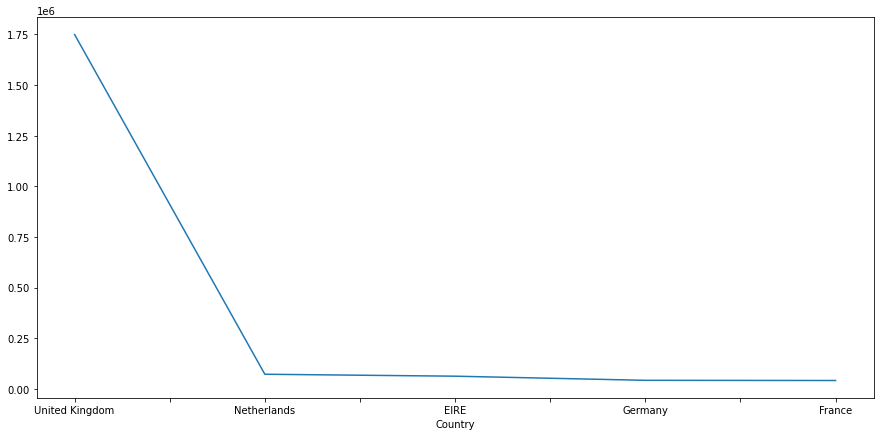

In [130]:
pays_top_5['montant_totat'].groupby(pays_top_5['Country']).agg('sum').sort_values(ascending = False).head(5).plot(figsize = (15, 7))

## Question 6 

Fréquence. A quelle fréquence dépensent les 100 plus gros clients du Royaume-Uni ?

In [214]:
data_frequence = data.copy()

In [215]:
data_frequence 

,level_0,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,2010,12,1
1,1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,2010,12,1
2,2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,2010,12,1
3,3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,2010,12,1
4,4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,2010,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536635,536635,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France,2011,12,9
536636,536636,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France,2011,12,9
536637,536637,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France,2011,12,9
536638,536638,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France,2011,12,9


In [216]:
dt_reference = data_frequence.InvoiceDate.max()

In [217]:
dt_reference 

'2011-12-09'

In [154]:
data_frequence.head(2)

,level_0,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,2010,12,1
1,1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,2010,12,1


## Modèle 

#### 1. Quel sera le chiffre d’affaire global de la société en Décembre 2011 ?

In [190]:
Msk = (data['year']==2011) #& (data['month'].between(1,3))
Msk = data[Msk]

In [199]:
Msk['montant_totat']= Msk['Quantity']*Msk['UnitPrice']

C:\Users\mamef\AppData\Local\Temp/ipykernel_52572/3675508405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Msk['montant_totat']= Msk['Quantity']*Msk['UnitPrice']


In [200]:
Mask2 = (Msk[Msk['month'] == 12 ])

In [201]:
Mask2.head(3)

,level_0,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,montant_totat
511394,511394,516384,C579889,23245,SET OF 3 REGENCY CAKE TINS,8,2011-12-01,4.15,13853,United Kingdom,2011,12,1,33.20
511395,511395,516385,C579890,84947,ANTIQUE SILVER TEA GLASS ENGRAVED,1,2011-12-01,1.25,15197,United Kingdom,2011,12,1,1.25
511396,511396,516386,C579890,23374,RED SPOT PAPER GIFT BAG,1,2011-12-01,0.82,15197,United Kingdom,2011,12,1,0.82


In [204]:
Mask2.groupby(['Country']).agg({'montant_totat':'sum'}).sort_values('montant_totat',ascending=False).head(5)

,montant_totat
Country,
United Kingdom,795471.00
Netherlands,11728.02
Germany,8163.64
France,7505.01
EIRE,7358.74


In [205]:
united_kingdom_2 = Mask2[Mask2['Country'] == 'United Kingdom']
united_kingdom_2.head(2)

,level_0,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,montant_totat
511394,511394,516384,C579889,23245,SET OF 3 REGENCY CAKE TINS,8,2011-12-01,4.15,13853,United Kingdom,2011,12,1,33.20
511395,511395,516385,C579890,84947,ANTIQUE SILVER TEA GLASS ENGRAVED,1,2011-12-01,1.25,15197,United Kingdom,2011,12,1,1.25


In [206]:
united_kingdom_2.Country.unique()

array(['United Kingdom'], dtype=object)

In [208]:
ca = united_kingdom_2.montant_totat.sum()

In [209]:
print("le chiffre d’affaire global de la société en Décembre 2011 est de {} euro".format(ca))

le chiffre d’affaire global de la société en Décembre 2011 est de 795471.0 euro
